In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.datasets import make_gaussian_quantiles
from sklearn.preprocessing import PolynomialFeatures

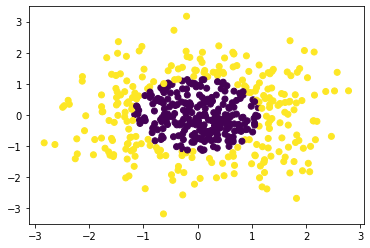

In [11]:
x_data, y_data = make_gaussian_quantiles(n_samples=500, n_features=2, n_classes=2)
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

In [12]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data, y_data)

LogisticRegression()

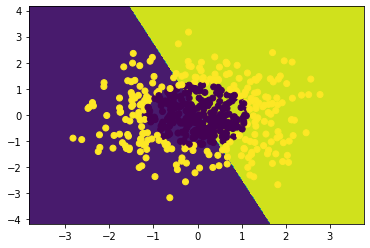

score: 0.542


In [15]:
# plot
x_min, x_max = x_data[:,0].min() - 1, x_data[:,0].max() + 1
y_min, y_max = x_data[:,1].min() - 1, x_data[:,1].max() + 1

# create meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)

# scatter
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

print('score:',logistic.score(x_data,y_data))

In [16]:
# 多项式回归
poly_reg = PolynomialFeatures(degree=5)
# 特征处理
x_poly = poly_reg.fit_transform(x_data)

# create model
logistic = linear_model.LogisticRegression()

# train the model 
logistic.fit(x_poly, y_data)

LogisticRegression()

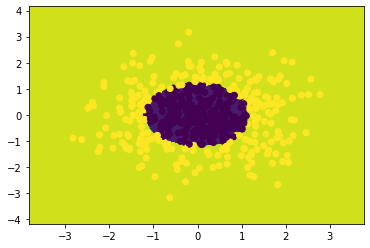

score: 0.988


In [18]:
# plot
x_min, x_max = x_data[:,0].min() - 1, x_data[:,0].max() + 1
y_min, y_max = x_data[:,1].min() - 1, x_data[:,1].max() + 1

# create meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

z = logistic.predict(poly_reg.fit_transform(np.c_[xx.ravel(), yy.ravel()]))
z = z.reshape(xx.shape)

# 等高线图
cs = plt.contourf(xx, yy, z)

# scatter
plt.scatter(x_data[:,0], x_data[:,1], c=y_data)
plt.show()

print('score:',logistic.score(x_poly,y_data))